# Mean-Reversion (возврат к среднему)

это торговая стратегия, основанная на предположении, что цена актива имеет тенденцию возвращаться к своему среднему значению после значительных отклонений

### Основные принципы:
* Цены активов колеблются вокруг исторического среднего значения
* Экстремальные движения цены обычно сменяются противоположным движением
* После значительного роста или падения цена стремится вернуться к "нормальному" уровню

### Формула расчета отклонения от среднего:
Отклонение = (Текущая_цена - Среднее_значение) / Стандартное_отклонение


In [104]:
from IPython.display import Image

Image(url='https://analystprep.com/study-notes/wp-content/uploads/2021/04/Img_12.jpg')

# Что такое стационарность (Stationary Process)
это важное свойство временного ряда, означающее, что его статистические характеристики (среднее значение, дисперсия и автокорреляция) остаются неизменными во времени. Стационарные ряды легче моделировать и прогнозировать, поэтому проверка на стационарность — важный шаг в анализе временных рядов

### Для стационарного ряда:
* Среднее значение постоянно
* Дисперсия постоянна
* Автоковариация не зависит от времени (зависит только от лага

## Статистические тесты
### 1. Тест Дики-Фуллера (ADF): Проверяет наличие единичного корня в ряде
$$\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \delta_2 \Delta y_{t-2} + ... + \delta_p \Delta y_{t-p} + \varepsilon_t$$

где:
- $\Delta y_t$ - первая разность ряда: $y_t - y_{t-1}$
- $\alpha$ - константа (дрейф)
- $\beta t$ - линейный временной тренд
- $\gamma$ - коэффициент, значимость которого тестируется
- $\delta_i$ - коэффициенты при лаговых значениях первых разностей
- $\varepsilon_t$ - ошибка

Нулевая гипотеза: $H_0: \gamma = 0$ (наличие единичного корня, ряд нестационарен)
Альтернативная гипотеза: $H_1: \gamma < 0$ (ряд стационарен)

### 2. Тест Квятковского-Филлипса-Шмидта-Шина (KPSS): Тестирует гипотезу стационарности против альтернативы наличия единичного корня
$$y_t = \delta t + r_t + \varepsilon_t$$

где:
- $\delta t$ - детерминированный тренд
- $r_t = r_{t-1} + u_t$ - случайное блуждание
- $u_t$ - независимый и одинаково распределенный процесс с нулевым средним и дисперсией $\sigma_u^2$
- $\varepsilon_t$ - стационарная ошибка

Тестовая статистика KPSS:

$$KPSS = \frac{1}{T^2} \frac{\sum_{t=1}^{T} S_t^2}{\hat{\sigma}_{\varepsilon}^2}$$

где:
- $S_t = \sum_{i=1}^{t} \hat{\varepsilon}_i$ - частичные суммы остатков
- $\hat{\sigma}_{\varepsilon}^2$ - оценка дисперсии долгосрочной ошибки

Нулевая гипотеза: $H_0: \sigma_u^2 = 0$ (ряд стационарен)
Альтернативная гипотеза: $H_1: \sigma_u^2 > 0$ (ряд нестационарен)

Получение данных BTCUSDT с API Binance...

Первые 5 строк данных:
               close   returns
open_time                     
2022-08-19  20834.39       NaN
2022-08-20  21140.07  1.467190
2022-08-21  21515.61  1.776437
2022-08-22  21399.83 -0.538121
2022-08-23  21529.12  0.604164

=== ADF Test Results for Цена BTCUSDT ===
ADF Statistic: -0.0737
p-value: 0.9520
Critical Values:
	1%: -3.4370
	5%: -2.8645
	10%: -2.5683
Вывод: Цена BTCUSDT является нестационарным временным рядом (не можем отвергнуть нулевую гипотезу)


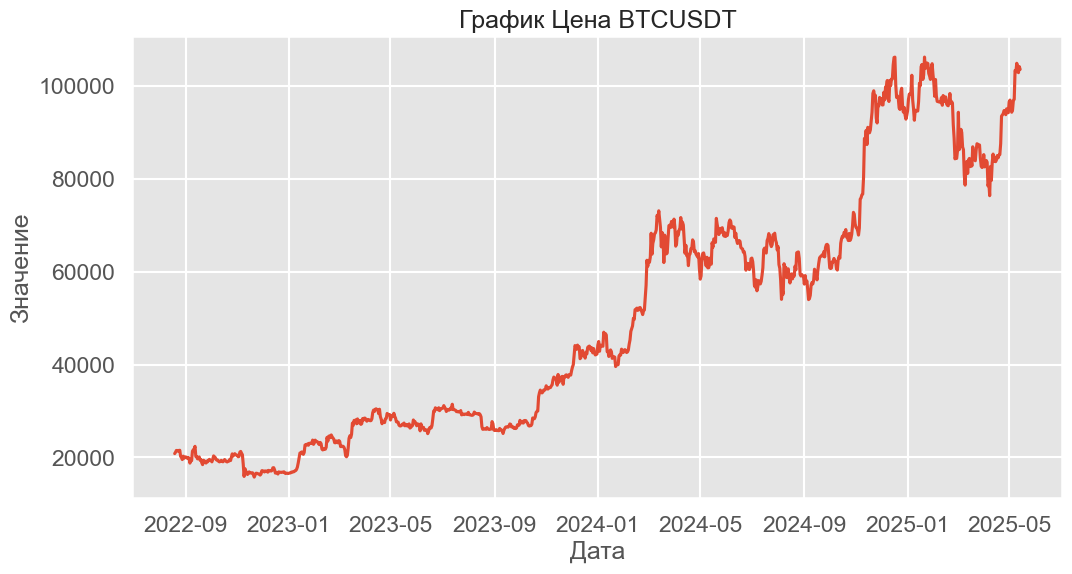


=== ADF Test Results for Доходность BTCUSDT ===
ADF Statistic: -33.1117
p-value: 0.0000
Critical Values:
	1%: -3.4369
	5%: -2.8644
	10%: -2.5683
Вывод: Доходность BTCUSDT является стационарным временным рядом (отвергаем нулевую гипотезу)


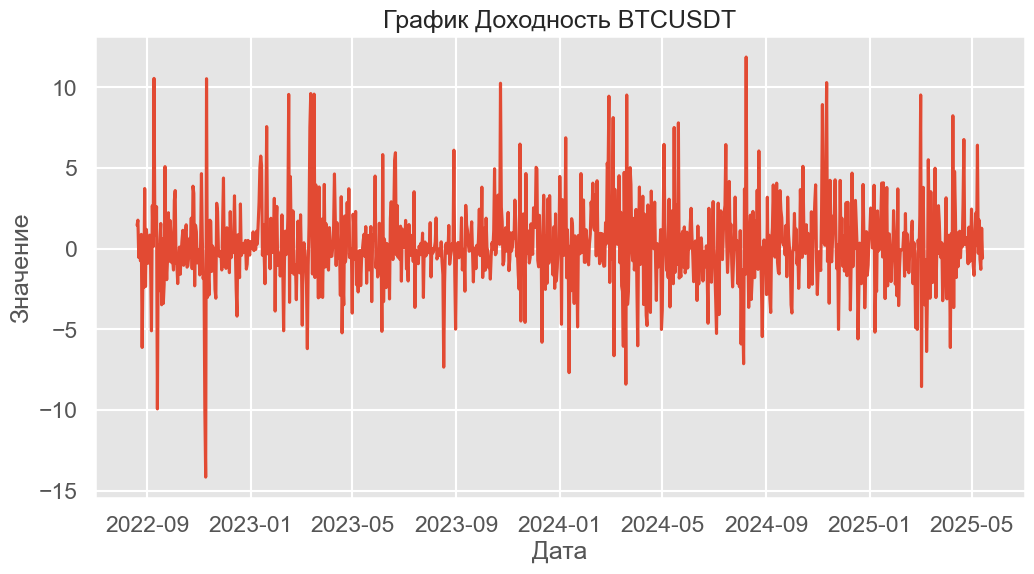


=== Сравнение результатов ===
ADF статистика для цены: -0.0737, p-value: 0.9520
ADF статистика для доходности: -33.1117, p-value: 0.0000

Это типичный случай для финансовых временных рядов:
- Цены обычно нестационарны (интегрированы порядка 1)
- Доходности обычно стационарны
Такой ряд обычно называют I(1) - интегрированным порядка 1


In [108]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from datetime import datetime

# Функция для получения данных BTCUSDT с API Binance
def get_binance_data(symbol='BTCUSDT', interval='1d', limit=1000):
    base_url = 'https://api.binance.com/api/v3/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    response = requests.get(base_url, params=params)
    data = response.json()
    
    # Преобразование данных в DataFrame
    df = pd.DataFrame(data, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 
                                     'close_time', 'quote_asset_volume', 'number_of_trades',
                                     'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    
    # Преобразование типов данных
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close'] = df['close'].astype(float)
    
    # Установка индекса на основе времени открытия
    df.set_index('open_time', inplace=True)
    
    return df

# Функция для проведения ADF теста и визуализации результатов
def perform_adf_test(series, title):
    # Проведение ADF теста
    result = adfuller(series.dropna())
    
    # Вывод результатов
    print(f"\n=== ADF Test Results for {title} ===")
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Интерпретация результатов
    if result[1] <= 0.05:
        print(f"Вывод: {title} является стационарным временным рядом (отвергаем нулевую гипотезу)")
    else:
        print(f"Вывод: {title} является нестационарным временным рядом (не можем отвергнуть нулевую гипотезу)")
    
    # Визуализация временного ряда
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title(f'График {title}')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.show()
    
    return result

# Основная функция
def main():
    # Получение данных
    print("Получение данных BTCUSDT с API Binance...")
    df = get_binance_data(symbol='BTCUSDT', interval='1d', limit=1000)
    
    # Вычисление доходности (процентное изменение)
    df['returns'] = df['close'].pct_change() * 100
    
    # Вывод первых строк данных
    print("\nПервые 5 строк данных:")
    print(df[['close', 'returns']].head())
    
    # Тестирование стационарности цены
    price_result = perform_adf_test(df['close'], 'Цена BTCUSDT')
    
    # Тестирование стационарности доходности
    returns_result = perform_adf_test(df['returns'], 'Доходность BTCUSDT')
    
    # Сравнение результатов
    print("\n=== Сравнение результатов ===")
    print(f"ADF статистика для цены: {price_result[0]:.4f}, p-value: {price_result[1]:.4f}")
    print(f"ADF статистика для доходности: {returns_result[0]:.4f}, p-value: {returns_result[1]:.4f}")
    
    if price_result[1] > 0.05 and returns_result[1] <= 0.05:
        print("\nЭто типичный случай для финансовых временных рядов:")
        print("- Цены обычно нестационарны (интегрированы порядка 1)")
        print("- Доходности обычно стационарны")
        print("Такой ряд обычно называют I(1) - интегрированным порядка 1")

if __name__ == "__main__":
    main()

# Статистические основы возврата к среднему - Z-score
представляет собой статистическую меру, которая показывает, на сколько стандартных отклонений текущее значение отличается от среднего значения в выборке. В контексте торговых стратегий mean-reversion, z-score рассчитывается по формуле:

$Z-score = (Текущее значение - Среднее значение) / Стандартное отклонение$


## Зачем используют z-score в mean-reversion стратегиях:
1. Нормализация данных
Z-score помогает нормализовать данные
2. Z-score позволяет количественно определить, насколько текущая цена отклонилась от своего исторического среднего значения в терминах стандартных отклонений
3. При использовании скользящих средних для расчета z-score, стратегия динамически адаптируется к изменяющимся рыночным условиям, поскольку среднее значение и стандартное отклонение пересчитываются для каждого нового периода.

## Что здесь делает Z-score для нашего кода?

1. Происходит нормализация цены BTCUSDT относительно её скользящего среднего значения и волатильности
2. Z-score определяет аномальные отклонения. Z-score показывает, насколько текущая цена отклонилась от своего "нормального" уровня в терминах стандартных отклонения
3. Генерирует торговые сигналы


Начало анализа стационарности BTCUSDT на 15-минутном таймфрейме
Загрузка данных из Binance API...
Загружено 2881 свечей с 2025-04-14 03:00:00 по 2025-05-14 03:00:00

Основные статистики цены:
count      2881.000000
mean      93776.389913
std        6334.211478
min       83146.010000
25%       87367.930000
50%       94433.620000
75%       96827.990000
max      105600.000000
Name: close, dtype: float64


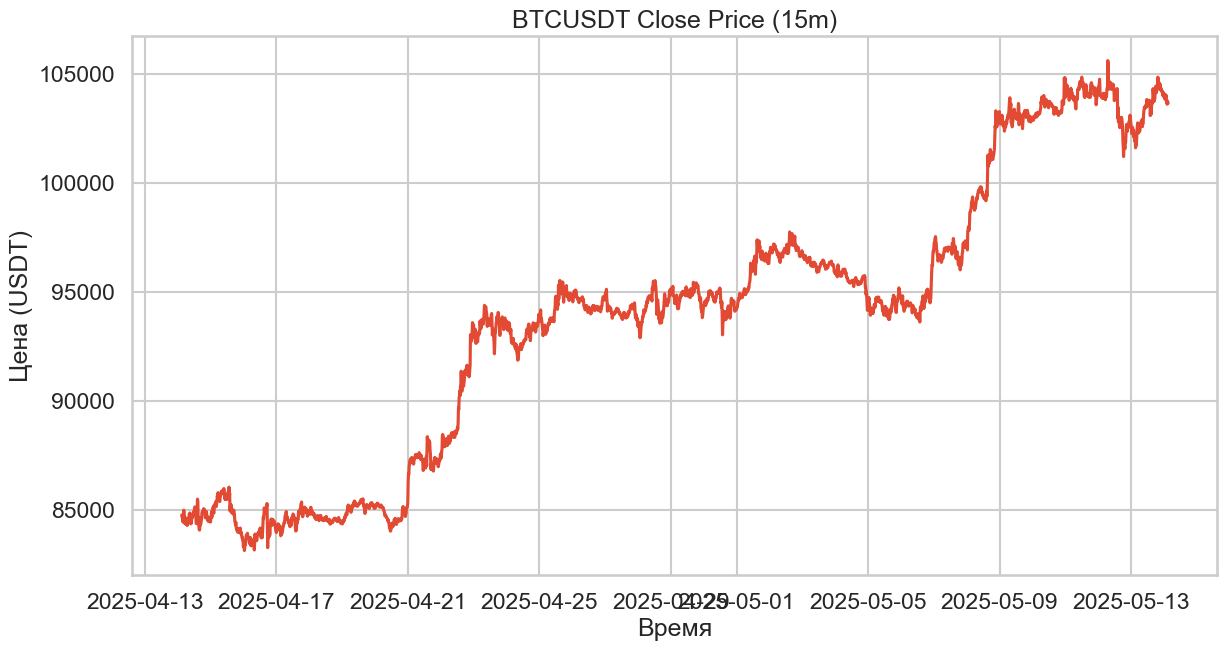


=== Тестирование стационарности цены закрытия ===
ADF Тест для BTCUSDT Close Price
ADF Статистика: -0.55915017034761
p-value: 0.8799478758848711
# Лагов: 2
# Наблюдений: 2878
Критическое значение (1%): -3.4326241980933294
Критическое значение (5%): -2.8625447866555227
Критическое значение (10%): -2.567304877006608
Вывод: Не можем отвергнуть нулевую гипотезу - ряд НЕСТАЦИОНАРЕН


KPSS Тест для BTCUSDT Close Price
KPSS Статистика: 8.043106672215762
p-value: 0.01
# Лагов: 31
Критическое значение (10%): 0.347
Критическое значение (5%): 0.463
Критическое значение (2.5%): 0.574
Критическое значение (1%): 0.739
Вывод: Отвергаем нулевую гипотезу - ряд НЕСТАЦИОНАРЕН


Вывод по цене: НЕСТАЦИОНАРНА

=== Расчет и тестирование стационарности Z-score ===
ADF Тест для Z-score
ADF Статистика: -13.252340524067767
p-value: 8.724896891573862e-25
# Лагов: 4
# Наблюдений: 2857
Критическое значение (1%): -3.432640929340317
Критическое значение (5%): -2.862552176016622
Критическое значение (10%): -2.5673088

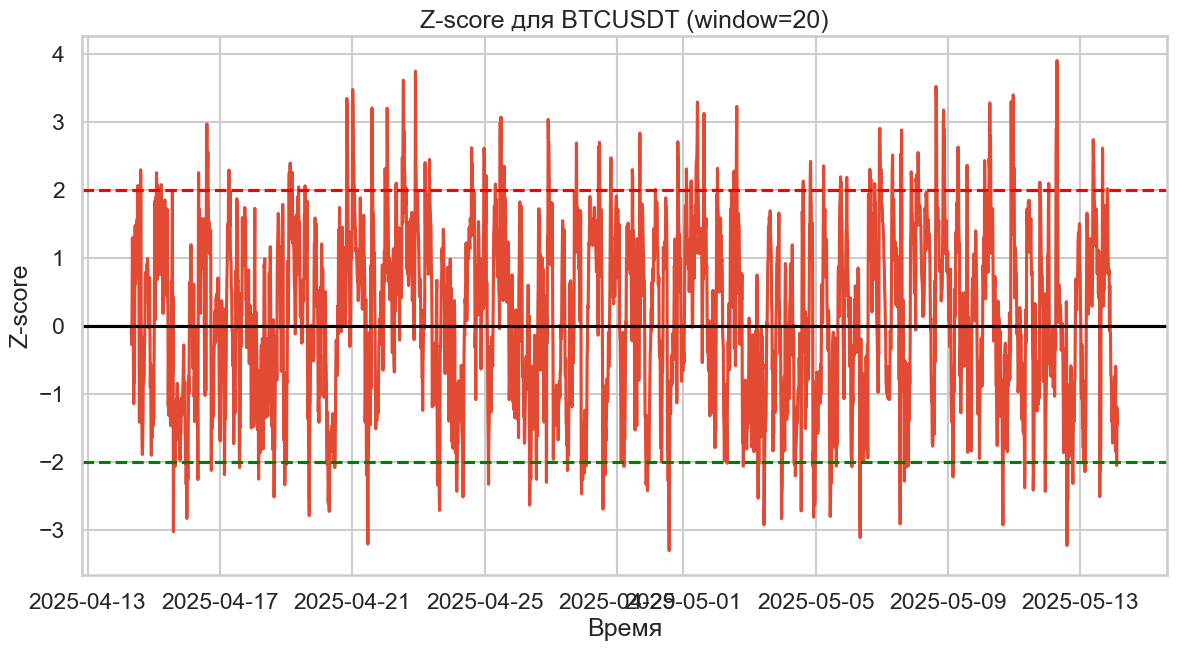


=== Создание и тестирование стратегии mean-reversion ===
Общая доходность стратегии: 9.03%
Доходность Buy & Hold: 22.26%
Количество сделок: 219


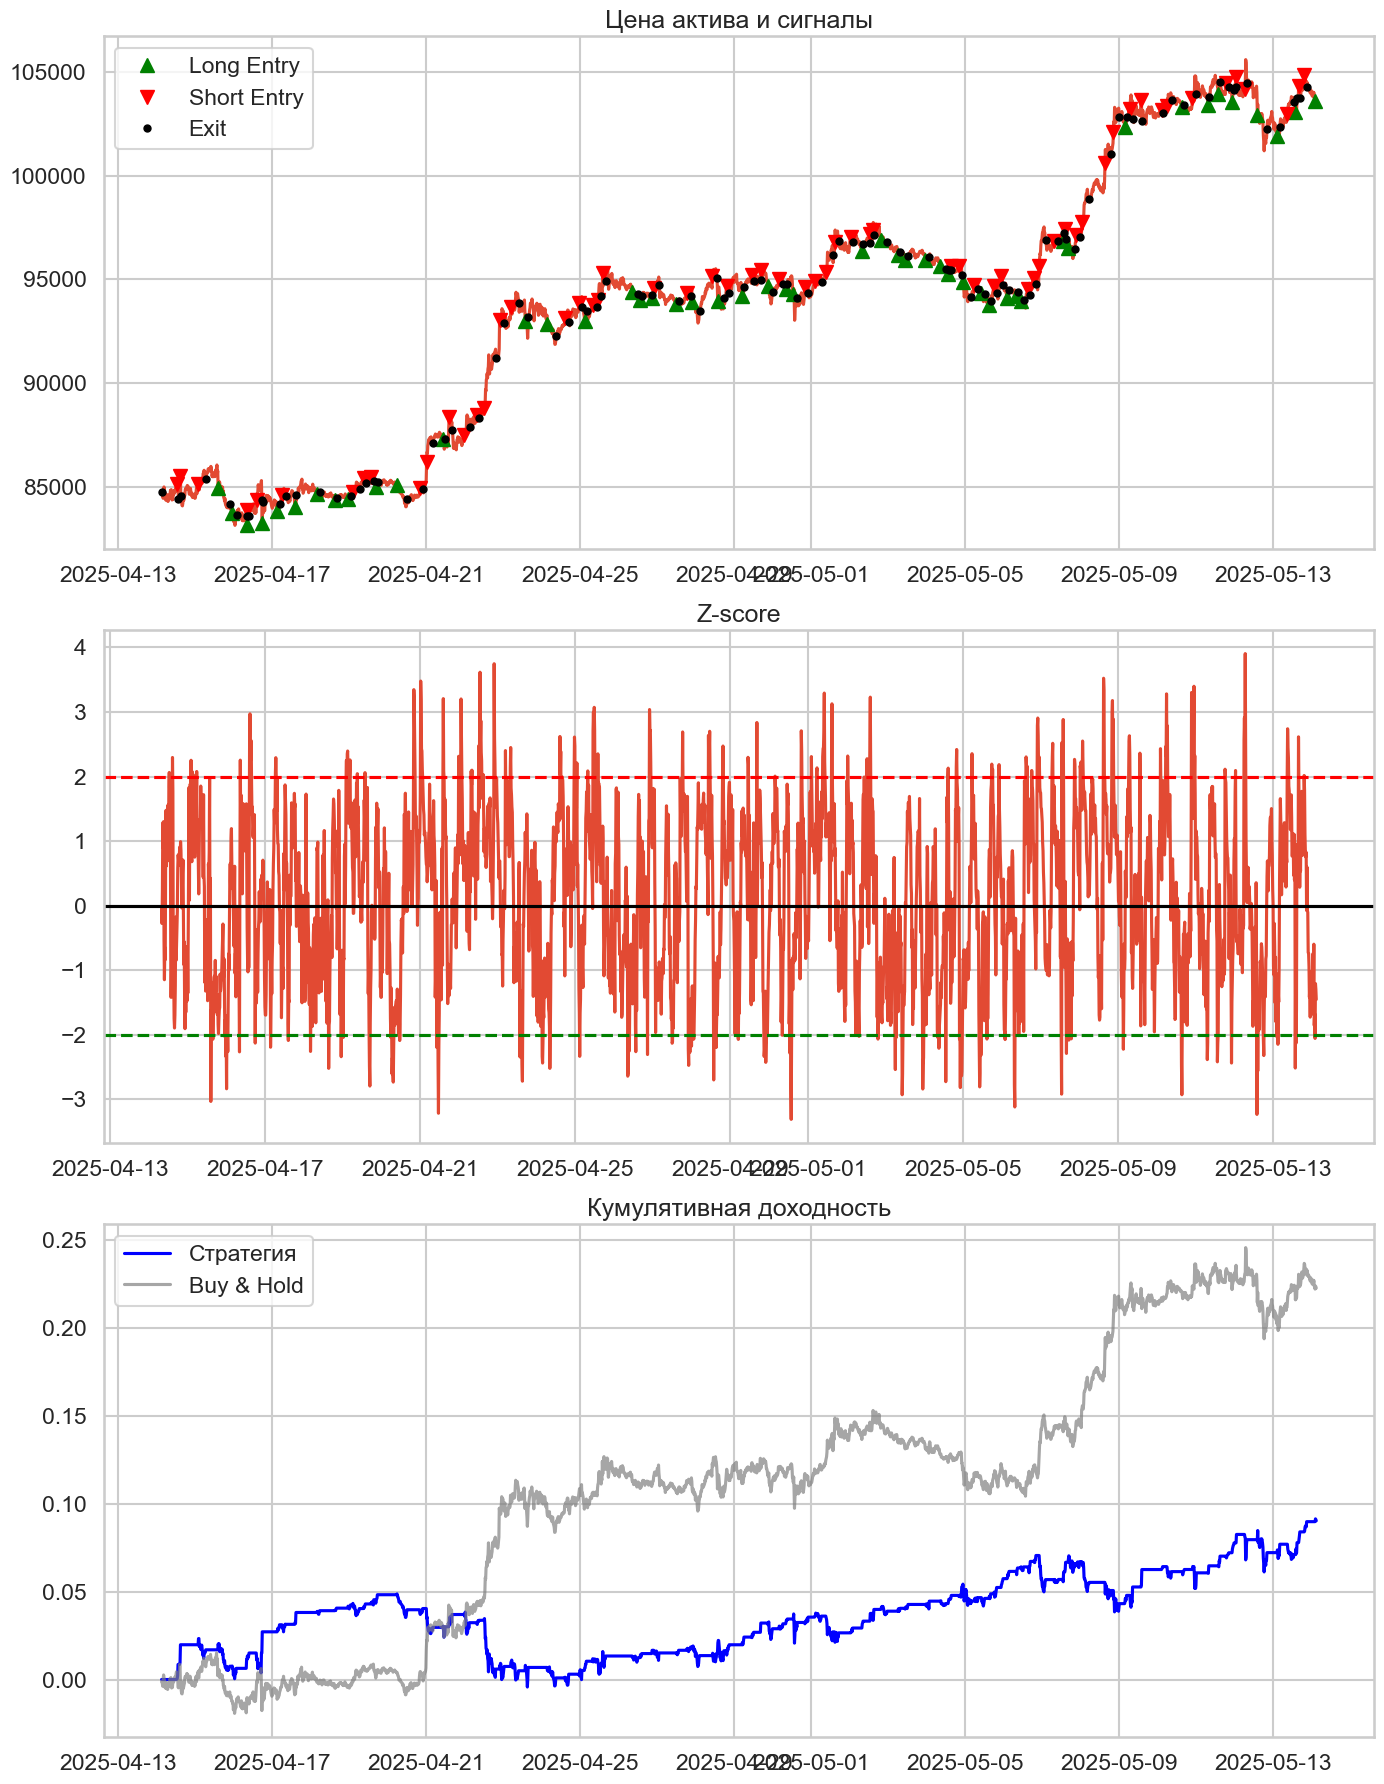

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from typing import Dict, Tuple
import time

# Настройка визуального стиля
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

class BinanceData:
    """Класс для загрузки данных из Binance API"""
    
    BASE_URL = 'https://api.binance.com/api/v3'
    
    @staticmethod
    def get_klines(symbol: str, interval: str = '15m', limit: int = 1000, 
                   start_time: int = None, end_time: int = None) -> pd.DataFrame:
        """Получение свечных данных (klines) из Binance API"""
        endpoint = '/klines'
        url = BinanceData.BASE_URL + endpoint
        
        params = {
            'symbol': symbol,
            'interval': interval,
            'limit': limit
        }
        
        if start_time:
            params['startTime'] = start_time
        if end_time:
            params['endTime'] = end_time
            
        response = requests.get(url, params=params)
        
        # Проверка на ошибки
        if response.status_code != 200:
            raise Exception(f"Ошибка API: {response.json()}")
            
        data = response.json()
        
        # Преобразование данных в DataFrame
        df = pd.DataFrame(data, columns=[
            'open_time', 'open', 'high', 'low', 'close', 'volume',
            'close_time', 'quote_asset_volume', 'number_of_trades',
            'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
        ])
        
        # Преобразование типов данных
        numeric_columns = ['open', 'high', 'low', 'close', 'volume', 
                           'quote_asset_volume', 'taker_buy_base_asset_volume', 
                           'taker_buy_quote_asset_volume']
        
        df[numeric_columns] = df[numeric_columns].astype(float)
        
        # Преобразование временных меток
        df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
        df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
        
        # Установка индекса
        df.set_index('open_time', inplace=True)
        
        return df

    @staticmethod
    def get_historical_klines(symbol: str, interval: str, 
                              start_date: str, end_date: str = None) -> pd.DataFrame:
        """Получение исторических данных за длительный период с автоматической пагинацией"""
        # Преобразование дат в миллисекунды
        start_ts = int(datetime.datetime.strptime(start_date, '%Y-%m-%d').timestamp() * 1000)
        
        if end_date:
            end_ts = int(datetime.datetime.strptime(end_date, '%Y-%m-%d').timestamp() * 1000)
        else:
            end_ts = int(datetime.datetime.now().timestamp() * 1000)
            
        # Список для хранения всех данных
        all_klines = []
        current_ts = start_ts
        
        while current_ts < end_ts:
            # Получение данных для текущего временного окна
            klines = BinanceData.get_klines(
                symbol=symbol,
                interval=interval,
                limit=1000,
                start_time=current_ts,
                end_time=end_ts
            )
            
            if klines.empty:
                break
                
            all_klines.append(klines)
            
            # Обновление временной метки для следующего запроса
            current_ts = int(klines.index[-1].timestamp() * 1000) + 1
            
            # Задержка, чтобы не превысить лимиты API
            time.sleep(0.5)
            
        if not all_klines:
            raise Exception("Не удалось получить данные")
            
        # Объединение всех данных
        result = pd.concat(all_klines)
        
        # Удаление возможных дубликатов
        result = result[~result.index.duplicated(keep='first')]
        
        # Сортировка по индексу
        result.sort_index(inplace=True)
        
        return result


class StationarityTester:
    """Класс для проверки временных рядов на стационарность"""
    
    @staticmethod
    def adf_test(series: pd.Series, title: str = '') -> Dict:
        """Расширенный тест Дики-Фуллера (ADF)"""
        print(f'ADF Тест для {title}')
        result = adfuller(series.dropna(), autolag='AIC')
        
        labels = ['ADF Статистика', 'p-value', '# Лагов', '# Наблюдений']
        out = {}
        
        for key, value in zip(labels, result[:4]):
            out[key] = value
            print(f'{key}: {value}')
            
        for key, value in result[4].items():
            out[f'Критическое значение ({key})'] = value
            print(f'Критическое значение ({key}): {value}')
            
        if result[1] < 0.05:
            print('Вывод: Отвергаем нулевую гипотезу - ряд СТАЦИОНАРЕН')
            out['Стационарен'] = True
        else:
            print('Вывод: Не можем отвергнуть нулевую гипотезу - ряд НЕСТАЦИОНАРЕН')
            out['Стационарен'] = False
            
        print('\n')
        return out
    
    @staticmethod
    def kpss_test(series: pd.Series, title: str = '') -> Dict:
        """Тест KPSS на стационарность"""
        print(f'KPSS Тест для {title}')
        result = kpss(series.dropna(), regression='c', nlags='auto')
        
        labels = ['KPSS Статистика', 'p-value', '# Лагов']
        out = {}
        
        for key, value in zip(labels, result[:3]):
            out[key] = value
            print(f'{key}: {value}')
            
        for key, value in result[3].items():
            out[f'Критическое значение ({key})'] = value
            print(f'Критическое значение ({key}): {value}')
            
        if result[1] < 0.05:
            print('Вывод: Отвергаем нулевую гипотезу - ряд НЕСТАЦИОНАРЕН')
            out['Стационарен'] = False
        else:
            print('Вывод: Не можем отвергнуть нулевую гипотезу - ряд СТАЦИОНАРЕН')
            out['Стационарен'] = True
            
        print('\n')
        return out


class MeanReversionStrategy:
    """Класс для разработки и тестирования стратегий mean-reversion"""
    
    @staticmethod
    def calculate_z_score(series: pd.Series, window: int = 20) -> pd.Series:
        """Расчет Z-score для временного ряда"""
        rolling_mean = series.rolling(window=window).mean()
        rolling_std = series.rolling(window=window).std()
        z_score = (series - rolling_mean) / rolling_std
        return z_score
    
    @staticmethod
    def mean_reversion_strategy(
        series: pd.Series, 
        window: int = 20, 
        entry_z: float = 2.0, 
        exit_z: float = 0.5,
        stop_loss_pct: float = 0.05
    ) -> pd.DataFrame:
        """Реализация стратегии mean-reversion на основе Z-score"""
        # Расчет Z-score
        z_score = MeanReversionStrategy.calculate_z_score(series, window)
        
        # Создание DataFrame для сигналов
        signals = pd.DataFrame(index=series.index)
        signals['price'] = series
        signals['z_score'] = z_score
        
        # Инициализация полей
        signals['signal'] = 0  # 1: Long, -1: Short, 0: No position
        signals['position'] = 0
        signals['entry_price'] = np.nan
        signals['stop_loss'] = np.nan
        
        # Генерация сигналов входа
        signals.loc[signals['z_score'] < -entry_z, 'signal'] = 1  # Long signal
        signals.loc[signals['z_score'] > entry_z, 'signal'] = -1  # Short signal
        
        # Инициализация позиции
        position = 0
        entry_price = 0
        stop_loss = 0
        
        # Проход по данным для определения позиций и стоп-лоссов
        for i in range(len(signals)):
            price = signals['price'].iloc[i]
            signal = signals['signal'].iloc[i]
            z = signals['z_score'].iloc[i]
            
            # Если у нас нет позиции и есть сигнал
            if position == 0 and signal != 0:
                position = signal
                entry_price = price
                
                # Устанавливаем стоп-лосс
                if position == 1:  # Long
                    stop_loss = entry_price * (1 - stop_loss_pct)
                else:  # Short
                    stop_loss = entry_price * (1 + stop_loss_pct)
            
            # Если у нас есть позиция и нет нового сигнала
            elif position != 0:
                # Проверка на срабатывание стоп-лосса
                if (position == 1 and price <= stop_loss) or (position == -1 and price >= stop_loss):
                    position = 0
                    entry_price = 0
                    stop_loss = 0
                
                # Проверка на сигнал выхода (Z-score приближается к среднему)
                elif (position == 1 and z > -exit_z) or (position == -1 and z < exit_z):
                    position = 0
                    entry_price = 0
                    stop_loss = 0
            
            # Записываем текущее состояние
            signals['position'].iloc[i] = position
            signals['entry_price'].iloc[i] = entry_price
            signals['stop_loss'].iloc[i] = stop_loss
        
        # Расчет доходности
        signals['returns'] = series.pct_change()
        signals['strategy_returns'] = signals['position'].shift(1) * signals['returns']
        
        # Кумулятивная доходность
        signals['cumulative_returns'] = (1 + signals['returns']).cumprod() - 1
        signals['strategy_cumulative_returns'] = (1 + signals['strategy_returns']).cumprod() - 1
        
        return signals
    
    @staticmethod
    def plot_strategy_results(signals: pd.DataFrame) -> None:
        """Визуализация результатов стратегии"""
        fig, axes = plt.subplots(3, 1, figsize=(14, 18))
        
        # 1. График цены с индикацией сделок
        axes[0].plot(signals['price'])
        axes[0].set_title('Цена актива и сигналы')
        
        # Отмечаем сигналы на графике
        long_entries = signals[(signals['position'].shift(1) == 0) & (signals['position'] == 1)]
        short_entries = signals[(signals['position'].shift(1) == 0) & (signals['position'] == -1)]
        exits = signals[(signals['position'].shift(1) != 0) & (signals['position'] == 0)]
        
        axes[0].plot(long_entries.index, long_entries['price'], '^', markersize=10, color='g', label='Long Entry')
        axes[0].plot(short_entries.index, short_entries['price'], 'v', markersize=10, color='r', label='Short Entry')
        axes[0].plot(exits.index, exits['price'], 'o', markersize=5, color='black', label='Exit')
        axes[0].legend()
        
        # 2. График Z-score
        axes[1].plot(signals['z_score'])
        axes[1].axhline(y=0, color='black', linestyle='-')
        axes[1].axhline(y=2, color='r', linestyle='--')
        axes[1].axhline(y=-2, color='g', linestyle='--')
        axes[1].set_title('Z-score')
        
        # 3. График кумулятивной доходности
        axes[2].plot(signals['strategy_cumulative_returns'], label='Стратегия', color='blue')
        axes[2].plot(signals['cumulative_returns'], label='Buy & Hold', color='gray', alpha=0.7)
        axes[2].set_title('Кумулятивная доходность')
        axes[2].legend()
        
        plt.tight_layout()
        plt.show()


def run_btcusdt_analysis():
    """Основная функция для анализа стационарности BTCUSDT"""
    print("Начало анализа стационарности BTCUSDT на 15-минутном таймфрейме")
    
    # Загрузка данных
    print("Загрузка данных из Binance API...")
    
    # Получение данных за последние 30 дней
    end_date = datetime.datetime.now().strftime('%Y-%m-%d')
    start_date = (datetime.datetime.now() - datetime.timedelta(days=30)).strftime('%Y-%m-%d')
    
    try:
        data = BinanceData.get_historical_klines('BTCUSDT', '15m', start_date, end_date)
        print(f"Загружено {len(data)} свечей с {data.index[0]} по {data.index[-1]}")
    except Exception as e:
        print(f"Ошибка при загрузке данных: {e}")
        return
    
    # Основные статистики
    print("\nОсновные статистики цены:")
    print(data['close'].describe())
    
    # Визуализация временного ряда цены
    plt.figure(figsize=(14, 7))
    plt.plot(data['close'])
    plt.title('BTCUSDT Close Price (15m)')
    plt.xlabel('Время')
    plt.ylabel('Цена (USDT)')
    plt.grid(True)
    plt.show()
    
    # 1. Тест стационарности для цены
    print("\n=== Тестирование стационарности цены закрытия ===")
    tester = StationarityTester
    price_adf = tester.adf_test(data['close'], 'BTCUSDT Close Price')
    price_kpss = tester.kpss_test(data['close'], 'BTCUSDT Close Price')
    
    price_stationary = price_adf['Стационарен'] and price_kpss['Стационарен']
    print(f"Вывод по цене: {'СТАЦИОНАРНА' if price_stationary else 'НЕСТАЦИОНАРНА'}")
    
    # 2. Рассчитываем и тестируем Z-score
    print("\n=== Расчет и тестирование стационарности Z-score ===")
    z_score = MeanReversionStrategy.calculate_z_score(data['close'], window=20)
    z_score = z_score.dropna()  # Убираем NaN значения после скользящего окна
    
    z_adf = tester.adf_test(z_score, 'Z-score')
    z_kpss = tester.kpss_test(z_score, 'Z-score')
    
    z_stationary = z_adf['Стационарен'] and z_kpss['Стационарен']
    print(f"Вывод по Z-score: {'СТАЦИОНАРЕН' if z_stationary else 'НЕСТАЦИОНАРЕН'}")
    
    # 3. Визуализация Z-score
    plt.figure(figsize=(14, 7))
    plt.plot(z_score)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axhline(y=2, color='r', linestyle='--')
    plt.axhline(y=-2, color='g', linestyle='--')
    plt.title('Z-score для BTCUSDT (window=20)')
    plt.xlabel('Время')
    plt.ylabel('Z-score')
    plt.grid(True)
    plt.show()
    
    # 4. Создание и тестирование стратегии
    print("\n=== Создание и тестирование стратегии mean-reversion ===")
    signals = MeanReversionStrategy.mean_reversion_strategy(
        data['close'], 
        window=20, 
        entry_z=2.0, 
        exit_z=0.5
    )
    
    # 5. Расчет основных метрик стратегии
    total_return = signals['strategy_cumulative_returns'].iloc[-1]
    buy_hold_return = signals['cumulative_returns'].iloc[-1]
    
    # Считаем количество сделок
    trades = 0
    position_changes = signals['position'].diff().fillna(0)
    trades = (position_changes != 0).sum()
    
    print(f"Общая доходность стратегии: {total_return:.2%}")
    print(f"Доходность Buy & Hold: {buy_hold_return:.2%}")
    print(f"Количество сделок: {trades}")
    
    # 6. Визуализация результатов стратегии
    MeanReversionStrategy.plot_strategy_results(signals)


if __name__ == "__main__":
    run_btcusdt_analysis()

# Зависимость между значениям: Ковариация и Автоковариация

### 1. Ковариация (covariance)
это статистическая мера, которая показывает, как два случайных набора данных изменяются вместе. Она определяет направление линейной зависимости между двумя переменными

На практике ковариация оценивается по выборке:
$Cov(X,Y) = (1/n) Σ[(Xᵢ - X̄)(Yᵢ - Ȳ)]$, где:

* n — количество наблюдений
* X̄ и Ȳ — выборочные средние X и Y
* Σ обозначает сумму по всем наблюдениям i

### 2. Автоковариация
это ковариация временного ряда с самим собой, но со сдвигом во времени. Она показывает, как значения одной и той же переменной в разные моменты времени связаны между собо

На практике автоковариация оценивается:
$γ̂(k) = (1/N) Σ[(Xₜ - X̄)(Xₜ₊ₖ - X̄)]$, где:
* N — количество пар наблюдений
* X̄ — выборочное среднее


## Зачем нужны?
### Ковариация:
* Расчет риска портфеля (диверсификация)
* Оценка взаимозависимости различных рыночных факторов

### Автоковариация:
* Выявление трендов и циклов во временном ряде
* Определение сезонности в ценовых данных
* Основа для моделей временных рядов (ARMA, ARIMA, GARCH)

Получение данных BTC/USDT...
Получено 90 дней данных для BTC

Получение данных ETH/USDT...
Получено 90 дней данных для ETH

=== КОВАРИАЦИЯ между BTC и ETH ===
Ручной расчет: 1560412.780525
NumPy cov(): 1577945.508396
Pandas cov(): 1577945.508396
Корреляция Пирсона: 0.611239


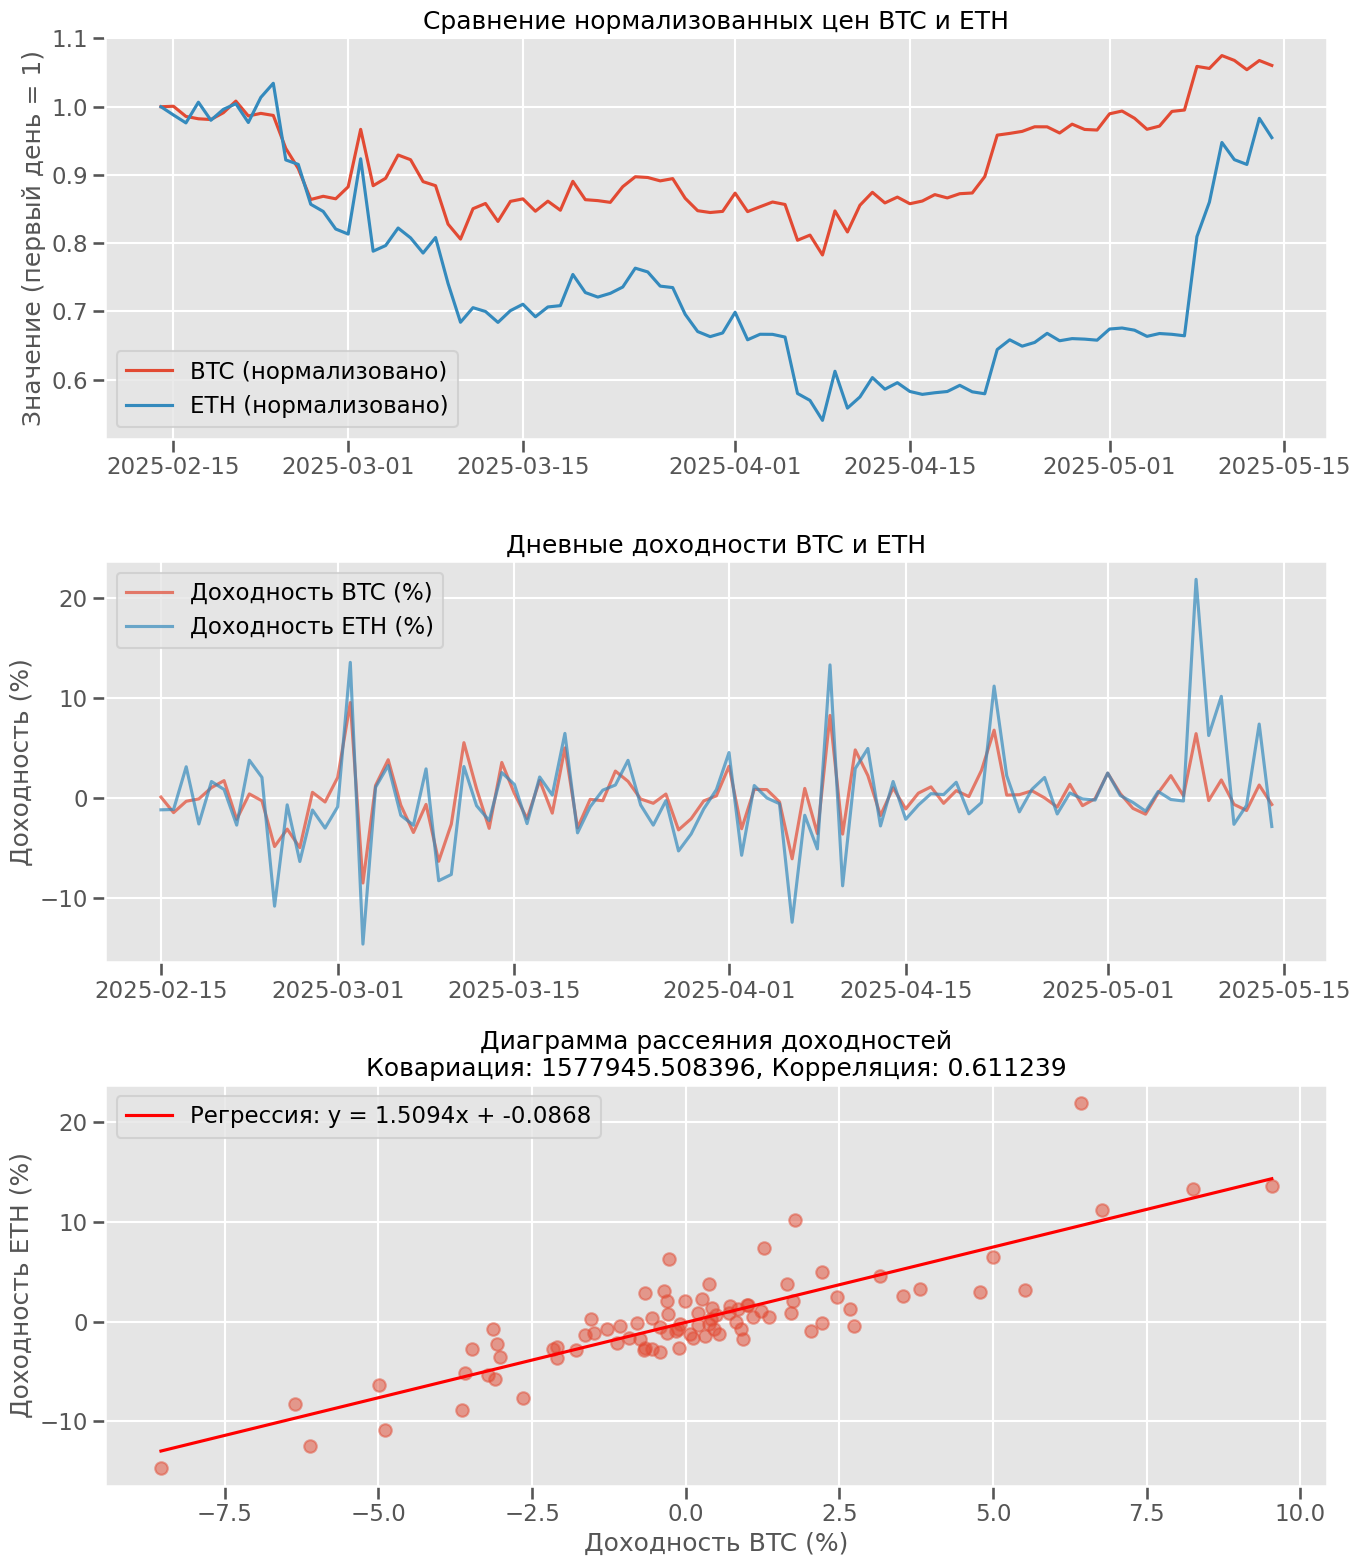

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acovf
import requests
from datetime import datetime, timedelta
import time

# Настройка для лучшего отображения графиков
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 10)
sns.set_context("talk")

# Функция для получения данных с API Binance
def get_historical_klines(symbol, interval, start_time, end_time=None):
    """
    Получает исторические данные цен с API Binance
    
    Параметры:
    ----------
    symbol : str
        Пара торговли (например, 'BTCUSDT')
    interval : str
        Интервал времени (например, '1d' для дневных свечей)
    start_time : datetime
        Начальная дата
    end_time : datetime, optional
        Конечная дата (по умолчанию - текущее время)
    
    Возвращает:
    ----------
    pandas.DataFrame: Данные исторических цен
    """
    BASE_URL = 'https://api.binance.com/api/v3/klines'
    
    # Преобразование datetime в миллисекунды timestamp
    start_ts = int(start_time.timestamp() * 1000)
    if end_time is not None:
        end_ts = int(end_time.timestamp() * 1000)
    else:
        end_ts = int(datetime.now().timestamp() * 1000)
    
    # Параметры запроса
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': start_ts,
        'endTime': end_ts,
        'limit': 1000  # Максимальное количество свечей в одном запросе
    }
    
    # Выполнение запроса
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    
    # Создание DataFrame из полученных данных
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 
                                     'close_time', 'quote_asset_volume', 'number_of_trades',
                                     'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    
    # Преобразование типов данных
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    for col in ['open', 'high', 'low', 'close', 'volume']:
        df[col] = df[col].astype(float)
    
    # Установка timestamp в качестве индекса
    df.set_index('timestamp', inplace=True)
    
    return df

# Функция для расчета доходностей
def calculate_returns(prices):
    """
    Рассчитывает процентные изменения (доходности) на основе временного ряда цен
    
    Параметры:
    ----------
    prices : pandas.Series
        Ряд цен актива
    
    Возвращает:
    ----------
    pandas.Series: Процентные изменения цен
    """
    return prices.pct_change() * 100  # Умножаем на 100 для получения процентов

# Функция для расчета ковариации двух наборов данных
def calculate_covariance(x, y):
    """
    Рассчитывает ковариацию между двумя наборами данных разными способами
    
    Параметры:
    ----------
    x, y : pandas.Series
        Ряды данных для расчета ковариации
    
    Возвращает:
    ----------
    dict: Результаты расчетов разными методами
    """
    # Очистка от NaN значений
    x = x.dropna()
    y = y.dropna()
    
    # Убедимся, что у нас одинаковое количество наблюдений
    common_index = x.index.intersection(y.index)
    x = x[common_index]
    y = y[common_index]
    
    # Расчет ковариации вручную
    def manual_cov(a, b):
        a_mean = a.mean()
        b_mean = b.mean()
        cov_sum = ((a - a_mean) * (b - b_mean)).sum()
        return cov_sum / len(a)
    
    # Рассчитываем ковариацию разными способами
    results = {
        'manual': manual_cov(x, y),
        'numpy': np.cov(x, y)[0, 1],
        'pandas': x.cov(y)
    }
    
    return results

# Функция для визуализации и анализа ковариации
def visualize_covariance(series1, series2, title1, title2):
    """
    Визуализирует ковариацию между двумя временными рядами
    
    Параметры:
    ----------
    series1, series2 : pandas.Series
        Ряды данных для анализа
    title1, title2 : str
        Названия рядов данных
    """
    # Очистка от NaN значений
    common_index = series1.dropna().index.intersection(series2.dropna().index)
    s1 = series1[common_index]
    s2 = series2[common_index]
    
    # Расчет ковариации
    cov_results = calculate_covariance(s1, s2)
    
    # Вывод результатов
    print(f"\n=== КОВАРИАЦИЯ между {title1} и {title2} ===")
    print(f"Ручной расчет: {cov_results['manual']:.6f}")
    print(f"NumPy cov(): {cov_results['numpy']:.6f}")
    print(f"Pandas cov(): {cov_results['pandas']:.6f}")
    
    # Расчет корреляции (нормированной ковариации)
    correlation = s1.corr(s2)
    print(f"Корреляция Пирсона: {correlation:.6f}")
    
    # Визуализация
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 16))
    
    # График 1: Цены активов (нормализованные)
    s1_norm = s1 / s1.iloc[0]
    s2_norm = s2 / s2.iloc[0]
    
    ax1.plot(s1_norm, label=f'{title1} (нормализовано)')
    ax1.plot(s2_norm, label=f'{title2} (нормализовано)')
    ax1.set_title(f'Сравнение нормализованных цен {title1} и {title2}')
    ax1.set_ylabel('Значение (первый день = 1)')
    ax1.legend()
    ax1.grid(True)
    
    # График 2: Доходности
    returns1 = calculate_returns(s1)
    returns2 = calculate_returns(s2)
    
    ax2.plot(returns1, label=f'Доходность {title1} (%)', alpha=0.7)
    ax2.plot(returns2, label=f'Доходность {title2} (%)', alpha=0.7)
    ax2.set_title(f'Дневные доходности {title1} и {title2}')
    ax2.set_ylabel('Доходность (%)')
    ax2.legend()
    ax2.grid(True)
    
    # График 3: Диаграмма рассеяния доходностей
    ax3.scatter(returns1, returns2, alpha=0.5)
    ax3.set_title(f'Диаграмма рассеяния доходностей\nКовариация: {cov_results["pandas"]:.6f}, Корреляция: {correlation:.6f}')
    ax3.set_xlabel(f'Доходность {title1} (%)')
    ax3.set_ylabel(f'Доходность {title2} (%)')
    
    # Добавим линию регрессии
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(returns1.dropna(), returns2.dropna())
    x_line = np.linspace(returns1.min(), returns1.max(), 100)
    y_line = slope * x_line + intercept
    ax3.plot(x_line, y_line, 'r', label=f'Регрессия: y = {slope:.4f}x + {intercept:.4f}')
    ax3.legend()
    
    plt.tight_layout()
    plt.savefig(f'covariance_{title1}_{title2}.png')
    plt.show()
    

# Запуск анализа
if __name__ == "__main__":
    try:
        analyze_crypto()
    except Exception as e:
        print(f"Произошла ошибка: {e}")

## 1. Нормализация цен. Привели цены разных активов к одной шкале для возможности их сравнения
## 2. Диаграмма рассеяния доходностей
* Координата X — дневная доходность BTC (в %)
* Координата Y — дневная доходность ETH (в %) за тот же день $ax3.scatter(returns1, returns2, alpha=0.5)$
* Каждая точка представляет один день, где можно видеть, как менялись оба актива одновременно.
## 3. Расчет ковариации. Ковариация в нашем коде рассчитывается тремя способами:

* ### Ручной расчет
```python
def manual_cov(a, b):
    a_mean = a.mean()
    b_mean = b.mean()
    cov_sum = ((a - a_mean) * (b - b_mean)).sum()
    return cov_sum / len(a)
```

* ### Расчет через NumPy
$np.cov(x, y)[0, 1]$

* ### Расчет через Pandas
$x.cov(y)$


* ### В основе всех методов лежит формула: $Cov(X,Y) = (1/n) Σ[(Xi - X̄) × (Yi - Ȳ)]$, где:
* Xi — доходность BTC в день i
* Yi — доходность ETH в день i
* X̄ — средняя доходность BTC за весь период
* Ȳ — средняя доходность ETH за весь период

Ковариация показывает, как в среднем связаны отклонения доходностей двух активов от их средних значений

# Зависимость между значениям: Регрессия и авторегрессия

## 1. Регрессия
это статистический метод, который помогает определить, как одна переменная (зависимая) зависит от другой переменной (независимой). В нашем случае мы исследуем, как цена Ethereum (ETH) зависит от цены Bitcoin (BTC).
Представьте, что вы пытаетесь провести прямую линию через облако точек на графике так, чтобы эта линия наилучшим образом описывала зависимость между двумя показателями. Эта линия и будет нашей регрессионной моделью.

$y = β₁x + β₀ + ε$, где:

* y — зависимая переменная (в нашем случае цена ETH)
* x — независимая переменная (цена BTC)
* β₁ — коэффициент, показывающий, как сильно y изменяется при изменении x
* β₀ — константа (свободный член)
* ε — ошибка модели (остаток)

## Куда применять?
* Парный трейдинг. Находим сильную зависимость (высокий R²), отслеживанием отклонение от этой зависимости, встаем в позицию по экстремумам
* Mean-reversion

## 2. Авторегрессия
это особый случай регрессии, когда вы предсказываете будущие значения чего-либо на основе его же прошлых значений

## Представьте, что вы хотите предсказать цену биткоина:
* С помощью регрессии вы бы сказали:
"Цена биткоина зависит от количества поисковых запросов в Google, активности на Reddit и цены электроэнергии."
* С помощью авторегрессии вы бы сказали:
"Цена биткоина завтра зависит от цены биткоина сегодня, вчера и позавчера."

Начало анализа регрессии между BTCUSDT и ETHUSDT
Загрузка данных для BTCUSDT...
Загружено 365 записей для BTCUSDT
Загрузка данных для ETHUSDT...
Загружено 365 записей для ETHUSDT

Первые 5 строк подготовленных данных:
             BTCUSDT  ETHUSDT
open_time                    
2024-05-15  66206.50  3032.55
2024-05-16  65235.21  2944.70
2024-05-17  67024.00  3092.01
2024-05-18  66915.20  3122.94
2024-05-19  66274.01  3071.19


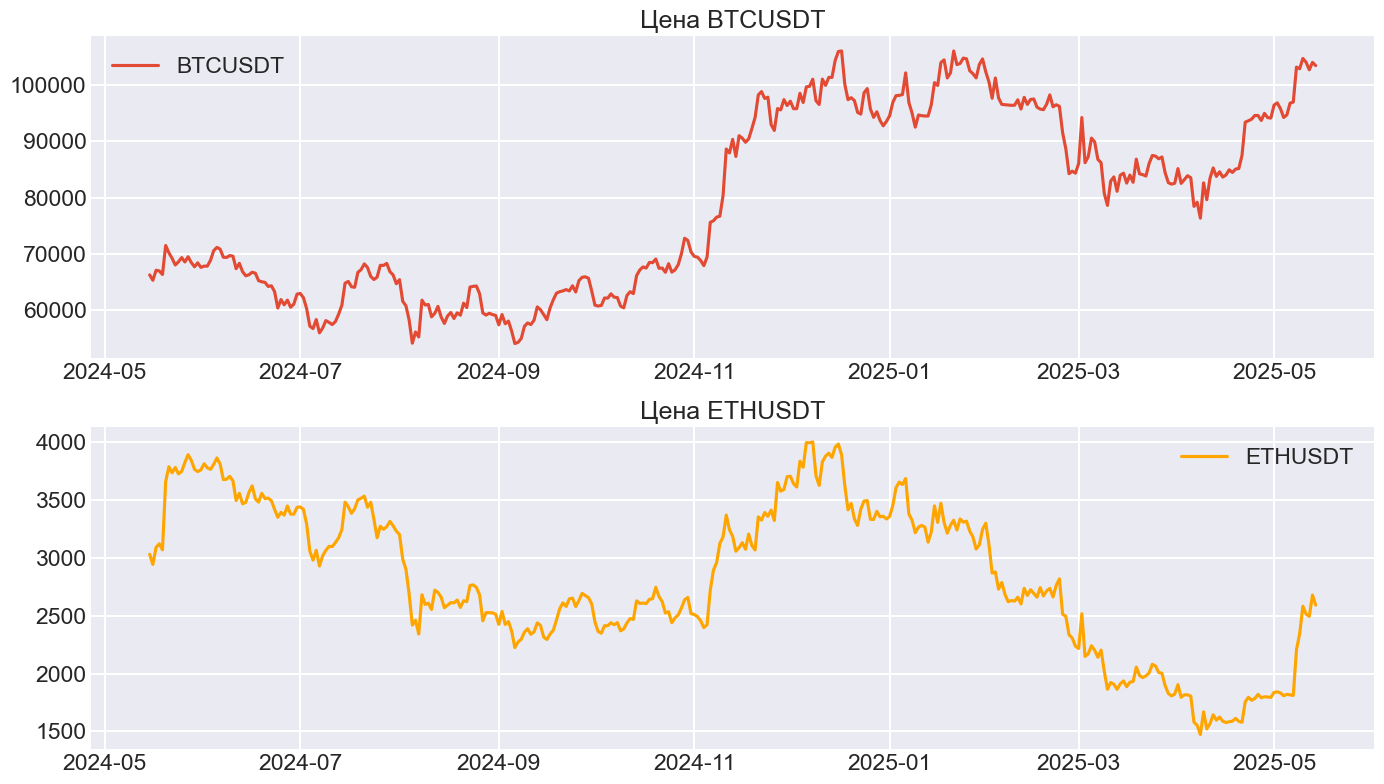

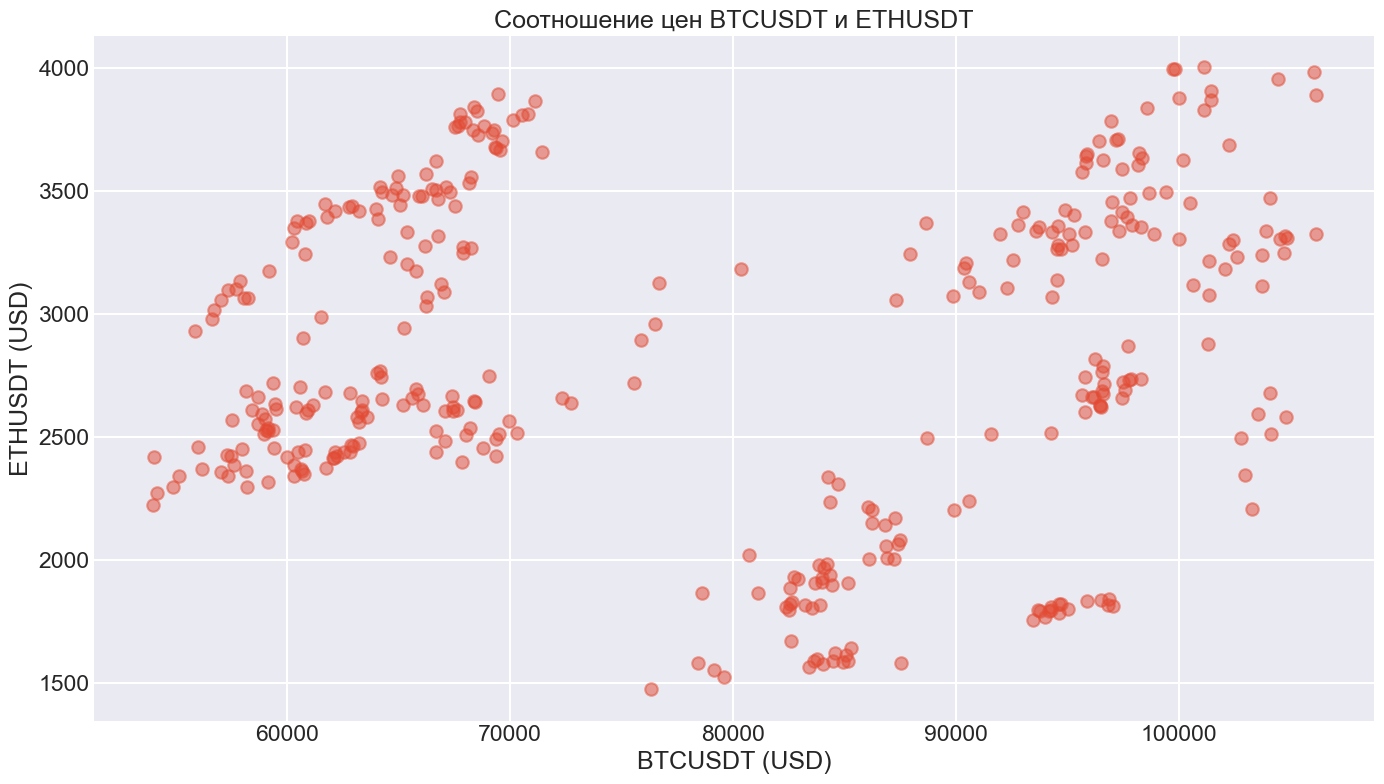


=== Линейная регрессия: ETHUSDT ~ BTCUSDT ===
Регрессия: ETHUSDT = 0.0026 * BTCUSDT + 2616.6488
R² = 0.0042, MSE = 415981.5626


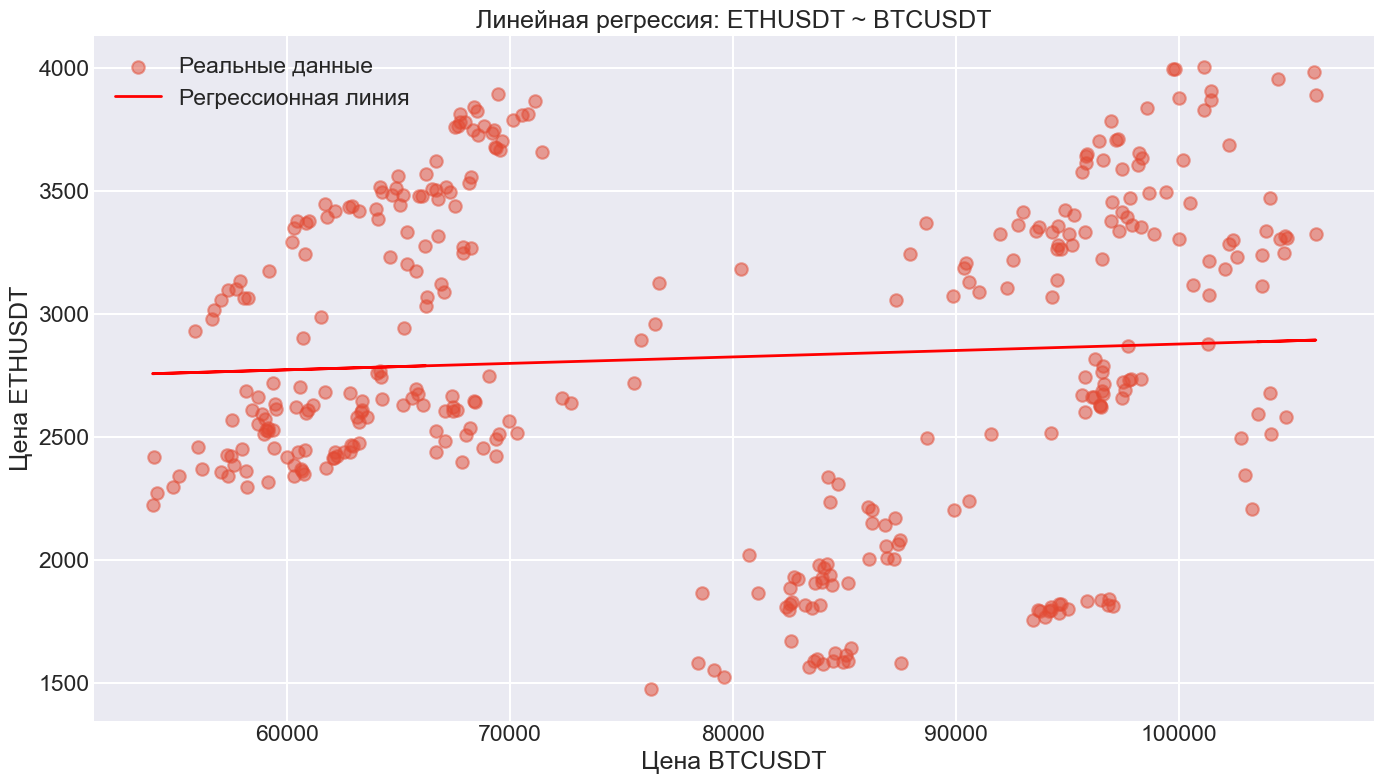


=== Анализ остатков регрессии ===


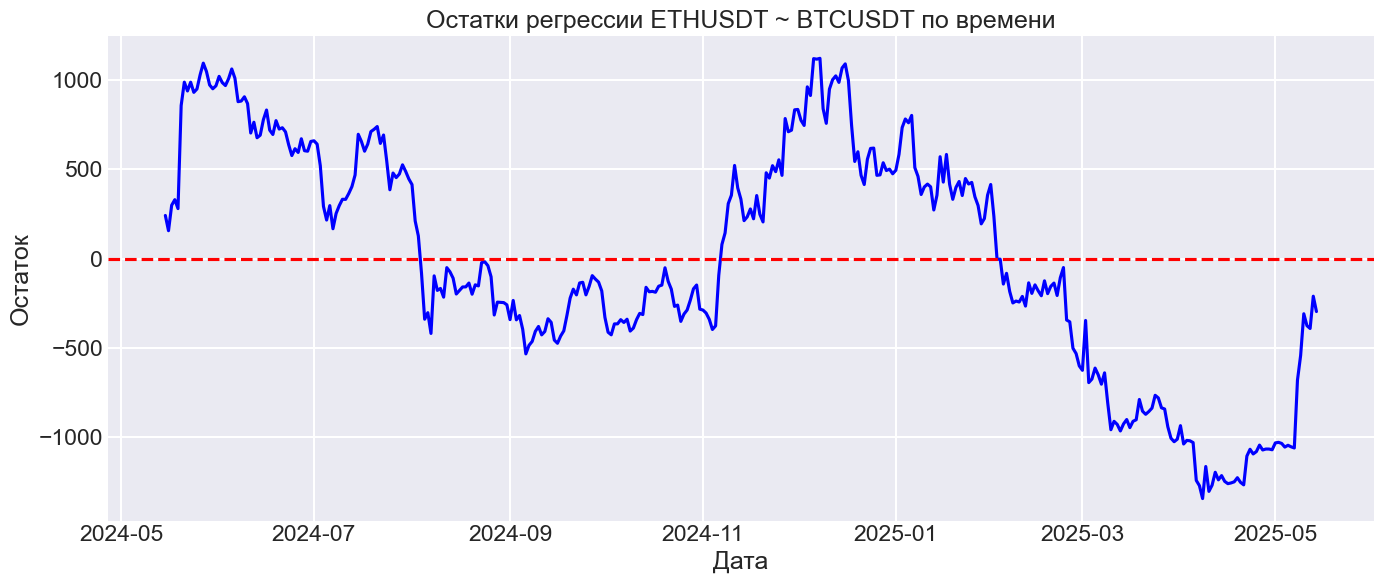

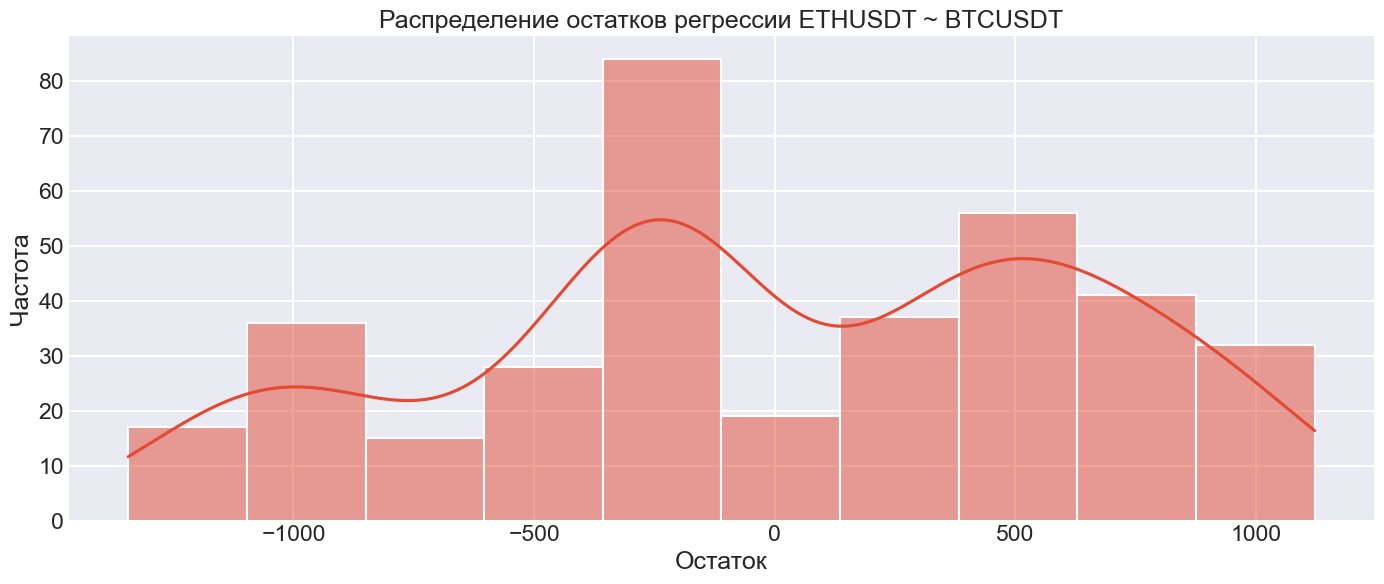


=== Расчет Z-score остатков регрессии ===


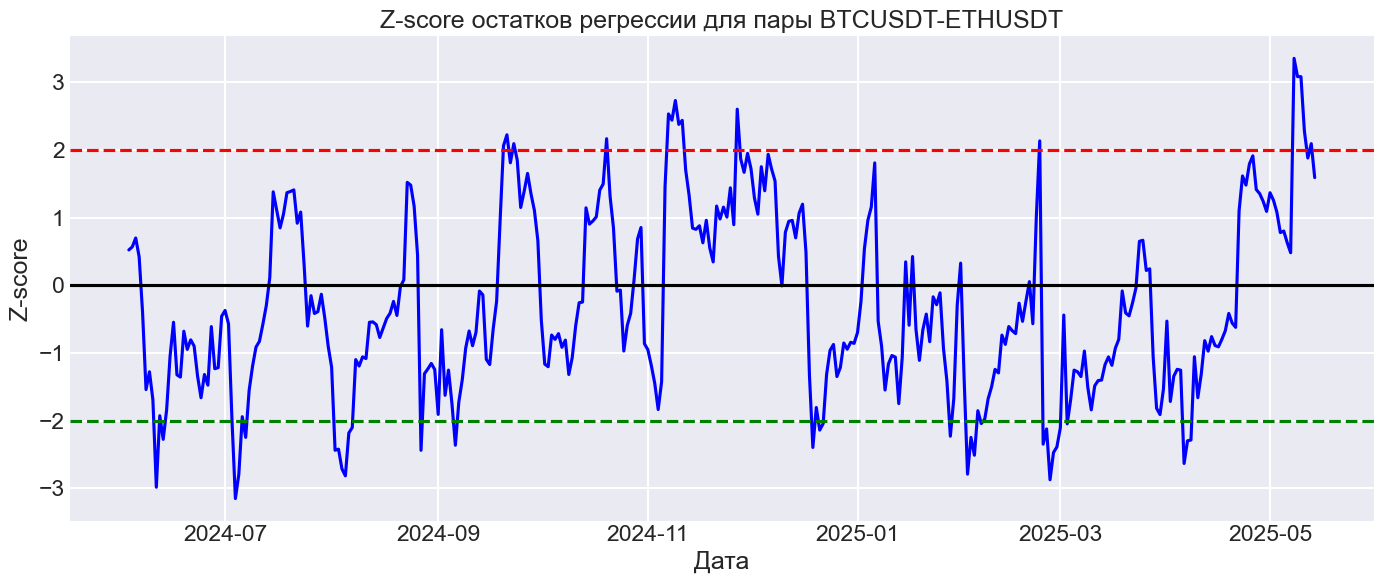


=== Интерпретация результатов ===
Модель регрессии: ETHUSDT = 0.0026 * BTCUSDT + 2616.6488
Это означает, что при изменении цены BTC на 1 USD, цена ETH в среднем изменяется на 0.0026 USD
R² = 0.0042 - это показывает, что 0.42% вариации цены ETH объясняется вариацией цены BTC
Слабая взаимосвязь между ценами BTC и ETH

Анализ завершен!


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta
import time

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

class BinanceData:
    """Класс для получения данных из Binance API"""
    
    BASE_URL = 'https://api.binance.com/api/v3'
    
    @staticmethod
    def get_klines(symbol, interval='1d', limit=1000, start_time=None, end_time=None):
        """Получение свечных данных (klines) из Binance API"""
        endpoint = '/klines'
        url = BinanceData.BASE_URL + endpoint
        
        params = {
            'symbol': symbol,
            'interval': interval,
            'limit': limit
        }
        
        if start_time:
            params['startTime'] = start_time
        if end_time:
            params['endTime'] = end_time
            
        response = requests.get(url, params=params)
        
        # Проверка на ошибки
        if response.status_code != 200:
            raise Exception(f"Ошибка API: {response.json()}")
            
        data = response.json()
        
        # Преобразование данных в DataFrame
        df = pd.DataFrame(data, columns=[
            'open_time', 'open', 'high', 'low', 'close', 'volume',
            'close_time', 'quote_asset_volume', 'number_of_trades',
            'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
        ])
        
        # Преобразование типов данных
        numeric_columns = ['open', 'high', 'low', 'close', 'volume']
        df[numeric_columns] = df[numeric_columns].astype(float)
        
        # Преобразование временных меток
        df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
        df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
        
        # Установка индекса
        df.set_index('open_time', inplace=True)
        
        return df
    
    @staticmethod
    def get_historical_data(symbols, interval='1d', days=365):
        """Получение исторических данных для нескольких символов"""
        # Расчет временных меток
        end_time = int(datetime.now().timestamp() * 1000)
        start_time = int((datetime.now() - timedelta(days=days)).timestamp() * 1000)
        
        result = {}
        
        for symbol in symbols:
            print(f"Загрузка данных для {symbol}...")
            try:
                df = BinanceData.get_klines(
                    symbol=symbol,
                    interval=interval,
                    limit=1000,
                    start_time=start_time,
                    end_time=end_time
                )
                result[symbol] = df
                print(f"Загружено {len(df)} записей для {symbol}")
                
                # Задержка, чтобы не превысить лимиты API
                time.sleep(0.5)
                
            except Exception as e:
                print(f"Ошибка при загрузке {symbol}: {e}")
        
        return result


class RegressionAnalysis:
    """Класс для регрессионного анализа криптовалютных данных"""
    
    @staticmethod
    def prepare_data_for_regression(data_dict, symbols):
        """Подготовка данных для регрессионного анализа"""
        # Проверяем, что у нас есть данные для всех символов
        for symbol in symbols:
            if symbol not in data_dict:
                raise Exception(f"Данные для {symbol} отсутствуют")
        
        # Создаем DataFrame с закрывающими ценами для всех символов
        result = pd.DataFrame()
        
        for symbol in symbols:
            result[symbol] = data_dict[symbol]['close']
        
        # Удаляем строки с пропущенными значениями
        result.dropna(inplace=True)
        
        return result
    
    @staticmethod
    def linear_regression(df, x_symbol, y_symbol):
        """Выполнение линейной регрессии для пары символов"""
        # Подготовка данных
        X = df[x_symbol].values.reshape(-1, 1)
        y = df[y_symbol].values
        
        # Создание и обучение модели
        model = LinearRegression()
        model.fit(X, y)
        
        # Предсказание
        y_pred = model.predict(X)
        
        # Расчет метрик
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        
        print(f"Регрессия: {y_symbol} = {model.coef_[0]:.4f} * {x_symbol} + {model.intercept_:.4f}")
        print(f"R² = {r2:.4f}, MSE = {mse:.4f}")
        
        # Визуализация
        plt.figure(figsize=(14, 8))
        plt.scatter(X, y, alpha=0.5, label='Реальные данные')
        plt.plot(X, y_pred, color='red', linewidth=2, label='Регрессионная линия')
        plt.title(f'Линейная регрессия: {y_symbol} ~ {x_symbol}')
        plt.xlabel(f'Цена {x_symbol}')
        plt.ylabel(f'Цена {y_symbol}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        return model, mse, r2
    
    @staticmethod
    def analyze_residuals(df, x_symbol, y_symbol, model):
        """Анализ остатков регрессии"""
        # Подготовка данных
        X = df[x_symbol].values.reshape(-1, 1)
        y = df[y_symbol].values
        
        # Предсказание
        y_pred = model.predict(X)
        
        # Расчет остатков
        residuals = y - y_pred
        
        # Создаем DataFrame с остатками
        residuals_df = pd.DataFrame({
            'date': df.index,
            'residual': residuals
        }).set_index('date')
        
        # Визуализация остатков по времени
        plt.figure(figsize=(14, 6))
        plt.plot(residuals_df.index, residuals_df['residual'], color='blue')
        plt.axhline(y=0, color='red', linestyle='--')
        plt.title(f'Остатки регрессии {y_symbol} ~ {x_symbol} по времени')
        plt.xlabel('Дата')
        plt.ylabel('Остаток')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Гистограмма остатков
        plt.figure(figsize=(14, 6))
        sns.histplot(residuals, kde=True)
        plt.title(f'Распределение остатков регрессии {y_symbol} ~ {x_symbol}')
        plt.xlabel('Остаток')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        return residuals_df
    
    @staticmethod
    def calculate_z_score(residuals, window=20):
        """Расчет Z-score остатков регрессии"""
        rolling_mean = residuals.rolling(window=window).mean()
        rolling_std = residuals.rolling(window=window).std()
        z_score = (residuals - rolling_mean) / rolling_std
        
        return z_score
    
    @staticmethod
    def plot_z_score(z_score, symbol_pair):
        """Визуализация Z-score"""
        plt.figure(figsize=(14, 6))
        plt.plot(z_score.index, z_score, color='blue')
        plt.axhline(y=0, color='black', linestyle='-')
        plt.axhline(y=2, color='red', linestyle='--')
        plt.axhline(y=-2, color='green', linestyle='--')
        plt.title(f'Z-score остатков регрессии для пары {symbol_pair}')
        plt.xlabel('Дата')
        plt.ylabel('Z-score')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


def run_btc_eth_regression_analysis():
    """Основная функция для анализа регрессии между BTC и ETH"""
    
    print("Начало анализа регрессии между BTCUSDT и ETHUSDT")
    
    # 1. Загрузка данных
    symbols = ['BTCUSDT', 'ETHUSDT']
    data = BinanceData.get_historical_data(symbols, interval='1d', days=365)
    
    # 2. Подготовка данных для регрессии
    df = RegressionAnalysis.prepare_data_for_regression(data, symbols)
    print("\nПервые 5 строк подготовленных данных:")
    print(df.head())
    
    # 3. Визуализация данных
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['BTCUSDT'], label='BTCUSDT')
    plt.title('Цена BTCUSDT')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['ETHUSDT'], label='ETHUSDT', color='orange')
    plt.title('Цена ETHUSDT')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 4. Диаграмма рассеяния
    plt.figure(figsize=(14, 8))
    plt.scatter(df['BTCUSDT'], df['ETHUSDT'], alpha=0.5)
    plt.title('Соотношение цен BTCUSDT и ETHUSDT')
    plt.xlabel('BTCUSDT (USD)')
    plt.ylabel('ETHUSDT (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 5. Выполнение линейной регрессии
    print("\n=== Линейная регрессия: ETHUSDT ~ BTCUSDT ===")
    model, mse, r2 = RegressionAnalysis.linear_regression(df, 'BTCUSDT', 'ETHUSDT')
    
    # 6. Анализ остатков
    print("\n=== Анализ остатков регрессии ===")
    residuals_df = RegressionAnalysis.analyze_residuals(df, 'BTCUSDT', 'ETHUSDT', model)
    
    # 7. Расчет и визуализация Z-score
    print("\n=== Расчет Z-score остатков регрессии ===")
    z_score = RegressionAnalysis.calculate_z_score(residuals_df['residual'], window=20)
    RegressionAnalysis.plot_z_score(z_score, 'BTCUSDT-ETHUSDT')
    
    # 8. Вывод коэффициентов и интерпретация
    coef = model.coef_[0]
    intercept = model.intercept_
    
    print("\n=== Интерпретация результатов ===")
    print(f"Модель регрессии: ETHUSDT = {coef:.4f} * BTCUSDT + {intercept:.4f}")
    print(f"Это означает, что при изменении цены BTC на 1 USD, цена ETH в среднем изменяется на {coef:.4f} USD")
    print(f"R² = {r2:.4f} - это показывает, что {r2*100:.2f}% вариации цены ETH объясняется вариацией цены BTC")
    
    if r2 > 0.7:
        print("Сильная взаимосвязь между ценами BTC и ETH")
    elif r2 > 0.5:
        print("Умеренная взаимосвязь между ценами BTC и ETH")
    else:
        print("Слабая взаимосвязь между ценами BTC и ETH")
    
    print("\nАнализ завершен!")


if __name__ == "__main__":
    run_btc_eth_regression_analysis()

## Как мы посчитали линейную регрессию ETHUSDT-BTCUSDT?
Мы использовали класс LinearRegression из библиотеки scikit-learn для построения модели, где BTCUSDT был независимой переменной (X), а ETHUSDT - зависимой переменной (y)
### 1. Подготовка данных
```
X = df['BTCUSDT'].values.reshape(-1, 1)
y = df['ETHUSDT'].values
```

### 2. Создание и обучение модели
```
model = LinearRegression()
model.fit(X, y)
```
### 3. Получения коэффициентов
```
coef = model.coef_[0]        # Угловой коэффициент, y = β₁ * x + β₀
intercept = model.intercept_ # Свободный член
```
### 4. Предсказание значений по модели
```
y_pred = model.predict(X)
```

### 5. Расчет метрик качества модели
```
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
```

## Как мы посчитали остатки регрессии по времени?
это разница между фактическими значениями ETHUSDT и значениями, предсказанными моделью. Остатки показывают, насколько реальная цена ETHUSDT отклоняется от "справедливой" цены, предсказанной на основе BTCUSDT. Положительные остатки указывают на относительную переоцененность ETH, отрицательные - на недооцененность.

### 1. Предсказание
```
y_pred = model.predict(X)
```

### 2. Расчет остатков
```
residuals = y - y_pred
```

### 3. Создаем DataFrame с остатками
```
residuals_df = pd.DataFrame({
    'date': df.index,
    'residual': residuals
}).set_index('date')
```

### 4.Визуализация остатков по времени
```
plt.figure(figsize=(14, 6))
plt.plot(residuals_df.index, residuals_df['residual'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
```


## Как мы посчитали z-score остатков регрессии?
Z-score нормализует остатки, показывая их отклонение от скользящего среднего в единицах стандартного отклонения
```
def calculate_z_score(residuals, window=20):
    """Расчет Z-score остатков регрессии"""
    # Скользящее среднее остатков
    rolling_mean = residuals.rolling(window=window).mean()
    
    # Скользящее стандартное отклонение остатков
    rolling_std = residuals.rolling(window=window).std()
    
    # Расчет Z-score
    z_score = (residuals - rolling_mean) / rolling_std
    
    return z_score
```

## Что такое r² и вариация цены
R² (коэффициент детерминации) - статистическая мера, показывающая долю вариации зависимой переменной, которая объясняется моделью:
* R² принимает значения от 0 до 1 (или от 0% до 100%)
* R² = 0.7 означает, что 70% изменений цены ETHUSDT можно объяснить изменениями цены BTCUSDT
Вариация цены - это мера разброса цены актива относительно среднего значения


## Ключевые моменты для понимания анализа

1. Линейная регрессия позволяет найти зависимость между ценой ETHUSDT и BTCUSDT в виде линейной функции
2. Остатки регрессии показывают, насколько фактическая цена ETHUSDT отличается от "ожидаемой" цены на основе BTCUSDT, и могут указывать на моменты переоцененности или недооцененности одного актива относительно другого
3. Z-score нормализует эти отклонения, позволяя выявлять статистически значимые аномалии, которые могут использоваться как торговые сигналы в стратегиях mean-reversion
4. R² количественно оценивает силу взаимосвязи между двумя активами и может использоваться для выбора подходящих пар для торговых стратегий

# Финализируем зависимость между значениям

### Регрессия vs Ковариация

* Ковариация описывает лишь степень совместной изменчивости, не подразумевает причинно-следственную связь и используется промежуточный шаг в анализе
* Регрессия позволяет предсказывать значения одной переменной на основе другой, часто (не всегда) интерпретируется как причинно-следственную связь и используется для моделирования и прошнозирования

Автоковариация vs Авторегрессия 
* Автоковариация описывает временную структуру зависимости в ряде, показывает линейную зависимость значений временного ряда от своих же прошлых значений 
* Авторегрессия создает модель для прогнозирования будущих значений ряда, показывает как текущее значение ряда можно выразить через его прошлые значения 

# Bollinger Bands: стандартные отклонения от скользящей средней
Полосы Боллинджера — это технический индикатор, состоящий из трех линий:

* Средняя линия (обычно 20-периодная SMA)
* Верхняя полоса (SMA + n * σ)
* Нижняя полоса (SMA - n * σ)

### Формулы для расчета Bollinger Bands:
* Средняя линия = SMA(n)
* Верхняя полоса = SMA(n) + m * σ_n
* Нижняя полоса = SMA(n) - m * σ_n

где:
* SMA(n) - простая скользящая средняя за n периодов
* σ_n - стандартное отклонение за n периодов
* m - множитель (обычно 2)


## Различия между Bollinger Bands и Z-score:

Представление:

* Bollinger Bands визуально представлены как полосы (верхняя и нижняя) вокруг скользящей средней на графике
* Z-score представлен как одна линия, показывающая число стандартных отклонений от среднего

* Bollinger Bands обычно используются непосредственно на ценовом графике
* Z-score чаще применяется как отдельный индикатор под основным графиком

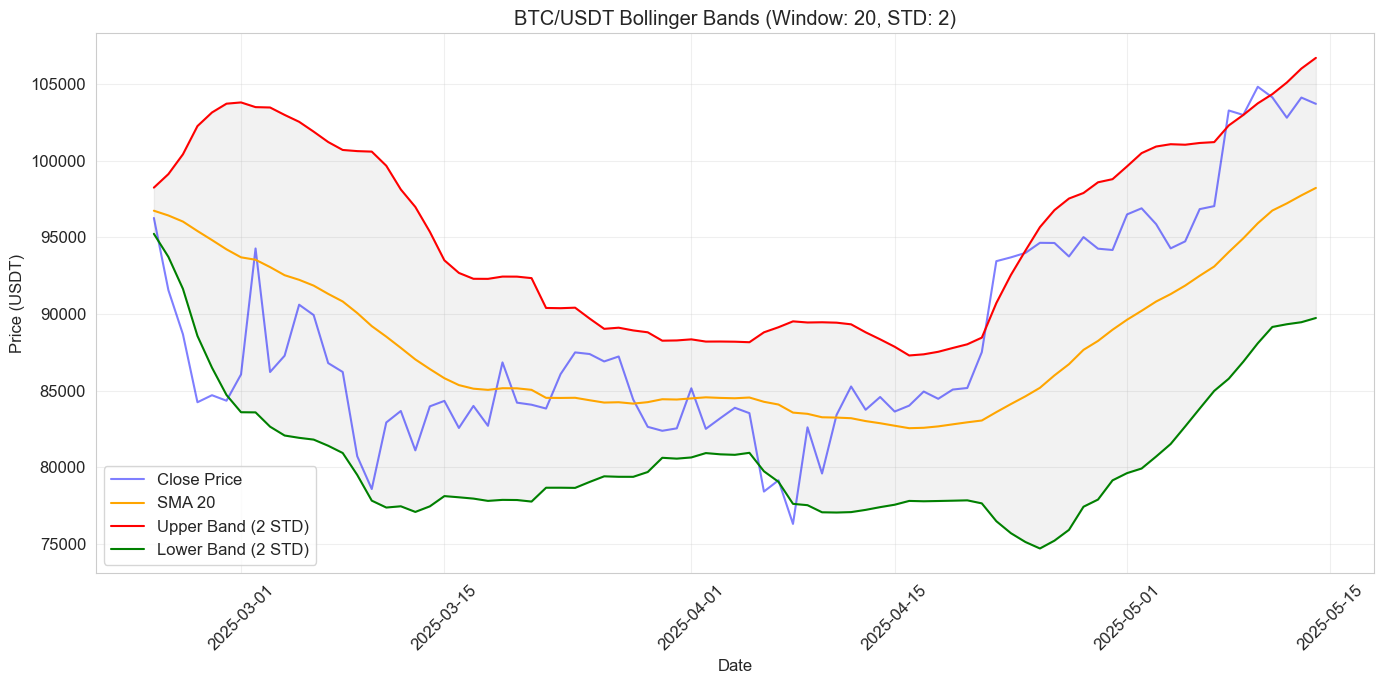


Latest BTC/USDT data with Bollinger Bands:
    open_time      close         SMA     Upper_Band    Lower_Band
95 2025-05-10  104809.53  95911.9580  103728.931596  88094.984404
96 2025-05-11  104118.00  96742.0465  104327.615212  89156.477788
97 2025-05-12  102791.32  97209.4630  105085.601817  89333.324183
98 2025-05-13  104103.72  97730.0950  105994.030977  89466.159023
99 2025-05-14  103695.06  98215.8245  106691.082442  89740.566558


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime

# Function to fetch BTC/USDT data from Binance public API
def fetch_binance_data(symbol="BTCUSDT", interval="1d", limit=100):
    base_url = "https://api.binance.com/api/v3/klines"
    params = {
        "symbol": symbol,
        "interval": interval,
        "limit": limit
    }
    
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        
        # Convert data to DataFrame
        df = pd.DataFrame(data, columns=[
            'open_time', 'open', 'high', 'low', 'close', 'volume',
            'close_time', 'quote_asset_volume', 'number_of_trades',
            'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
        ])
        
        # Convert timestamp to datetime
        df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
        df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
        
        # Convert price columns to float
        numeric_columns = ['open', 'high', 'low', 'close', 'volume']
        df[numeric_columns] = df[numeric_columns].astype(float)
        
        return df
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, window=20, num_std=2):
    # Calculate rolling mean and standard deviation
    df['SMA'] = df['close'].rolling(window=window).mean()
    df['STD'] = df['close'].rolling(window=window).std()
    
    # Calculate upper and lower bands
    df['Upper_Band'] = df['SMA'] + (df['STD'] * num_std)
    df['Lower_Band'] = df['SMA'] - (df['STD'] * num_std)
    
    return df

# Function to plot Bollinger Bands
def plot_bollinger_bands(df, window=20, num_std=2):
    plt.figure(figsize=(14, 7))
    
    # Plot closing price
    plt.plot(df['open_time'], df['close'], label='Close Price', color='blue', alpha=0.5)
    
    # Plot Bollinger Bands
    plt.plot(df['open_time'], df['SMA'], label=f'SMA {window}', color='orange')
    plt.plot(df['open_time'], df['Upper_Band'], label=f'Upper Band ({num_std} STD)', color='red')
    plt.plot(df['open_time'], df['Lower_Band'], label=f'Lower Band ({num_std} STD)', color='green')
    
    # Fill between bands
    plt.fill_between(df['open_time'], df['Upper_Band'], df['Lower_Band'], color='gray', alpha=0.1)
    
    # Set title and labels
    plt.title(f'BTC/USDT Bollinger Bands (Window: {window}, STD: {num_std})')
    plt.xlabel('Date')
    plt.ylabel('Price (USDT)')
    
    # Add grid and legend
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Rotate date labels
    plt.xticks(rotation=45)
    
    # Tight layout
    plt.tight_layout()
    
    # Show plot
    plt.show()

# Main function
def main():
    # Fetch BTC data for the last 100 days
    btc_data = fetch_binance_data(symbol="BTCUSDT", interval="1d", limit=100)
    
    if btc_data is not None:
        # Calculate Bollinger Bands with 20-day window and 2 standard deviations
        btc_with_bands = calculate_bollinger_bands(btc_data, window=20, num_std=2)
        
        # Drop NaN values (first 19 rows will have NaN for SMA and bands)
        btc_with_bands = btc_with_bands.dropna()
        
        # Plot the Bollinger Bands
        plot_bollinger_bands(btc_with_bands, window=20, num_std=2)
        
        # Print the latest data
        print("\nLatest BTC/USDT data with Bollinger Bands:")
        print(btc_with_bands[['open_time', 'close', 'SMA', 'Upper_Band', 'Lower_Band']].tail())
    else:
        print("Failed to fetch data from Binance API.")

# Run the script
if __name__ == "__main__":
    main()

# Оценка скорости возврата к среднему
Для оценки скорости возврата к среднему используется модель Орнштейна-Уленбека:

## Формула модели Орнштейна-Уленбека:
$dXt = θ(μ - Xt)dt + σdWt$, где:
* Xt - цена в момент времени t
* μ - долгосрочное среднее значение
* θ - скорость возврата к среднему
* σ - волатильность
* dWt - винеровский процесс (белый шум)
  
Дискретная форма для практического применения:
$Xt+1 - Xt = θ(μ - Xt) + εt$, где:
* εt - случайная ошибка
* θ - параметр скорости возврата

# Расчет полупериода возврата (half-life)
Полупериод возврата показывает, сколько времени требуется для преодоления половины расстояния до среднего значения.
Формула полупериода возврата:

$Half-life = ln(2) / θ ≈ 0.6931 / θ$, где:
θ - скорость возврата к среднему из модели Орнштейна-Уленбека

### Практический расчет полупериода:
* Вычисляем разности между последовательными ценами: Δy = yt - yt-1
* Регрессируем эти разности на отклонения от среднего: Δy = β(μ - yt-1) + ε
* Оцениваем параметр θ = -β
* Вычисляем полупериод: Half-life = ln(2) / θ

### Интерпретация полупериода:
* Меньшие значения → быстрый возврат к среднему (более эффективные mean-reversion стратегии)
* Большие значения → медленный возврат к среднему (требуются долгосрочные позиции)
* Отрицательные значения → отсутствие возврата к среднему (тренд)